In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # function from tensorflow.keras.utils is used to convert class labels (integers) into one-hot encoded vectors. 
#One-hot encoding is a common technique used in machine learning to convert categorical labels into a binary matrix representation.    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from scipy import stats


<H1>Keypoints using MP Holistic</H1>

In [3]:
mp_holistic = mp.solutions.holistic #Hoslitic nodel(object detection)
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color convertion BGR to RGB
    image.flags.writeable = False # Image to not writeable
    results = model.process(image) # make Prediction
    image.flags.writeable = True # Image to writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color convertion RGB to BGR
    return image,results

<ol>def draw_landmarks(image, results):</ol>
    <li>mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections</li>
    <li>mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections</li>
    <li>mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections</li>
    <li>mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections</li>

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
#capturing the cv for collecting keypoint for hand signs
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic: # it intialise the intial detection and tracking confidence
    while cap.isOpened():
    # read feed
        ret, frame = cap.read()
    
        #make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # draw Landmarks
        draw_landmarks(image, results)
    
        #show to the user
        cv2.imshow('OpenCV Feed', image)
    
        #break the loop by quit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

In [7]:
draw_landmarks(frame,results)

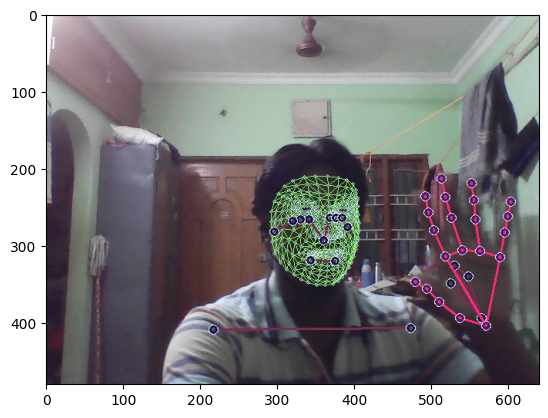

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

<h1>Extract KeyPoint Values</h1>

In [ ]:
results.pose_landmarks

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [12]:
pose

[array([ 0.56293273,  0.61092055, -0.89433908,  0.99998903]),
 array([ 0.57627225,  0.55149341, -0.8201707 ,  0.99998236]),
 array([ 0.58854735,  0.55056554, -0.82002145,  0.99998266]),
 array([ 0.60047257,  0.55055159, -0.81965065,  0.99998069]),
 array([ 0.53414941,  0.55458039, -0.84410536,  0.99998045]),
 array([ 0.51604187,  0.55597669, -0.84342355,  0.99997902]),
 array([ 0.50038069,  0.55841255, -0.8435955 ,  0.99997717]),
 array([ 0.61198604,  0.57619745, -0.41650432,  0.99998569]),
 array([ 0.46260619,  0.5875892 , -0.50391316,  0.99999022]),
 array([ 0.58602846,  0.66748726, -0.73988903,  0.99998093]),
 array([ 0.53620756,  0.66463649, -0.76994568,  0.99998522]),
 array([ 0.73924512,  0.84965414, -0.12045594,  0.99960726]),
 array([ 0.34025821,  0.85273898, -0.31771803,  0.99686456]),
 array([ 0.9965359 ,  1.12368572, -0.55362344,  0.88983804]),
 array([ 0.25897801,  1.25113332, -0.36276919,  0.56594187]),
 array([ 0.88400155,  0.82271636, -1.2032603 ,  0.9857896 ]),
 array([

In [15]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [ ]:
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [26]:
lh

array([ 8.92553806e-01,  8.42686415e-01,  3.45296883e-07,  8.39583099e-01,
        8.22224379e-01, -2.19932944e-02,  7.97929347e-01,  7.79125214e-01,
       -3.62745896e-02,  7.72645473e-01,  7.43025482e-01, -5.02518266e-02,
        7.49577165e-01,  7.24511087e-01, -6.41489774e-02,  8.10125589e-01,
        6.55649185e-01, -1.64234973e-02,  7.86637545e-01,  5.83522737e-01,
       -3.61742787e-02,  7.75389493e-01,  5.36739588e-01, -5.43910898e-02,
        7.68875897e-01,  4.93598014e-01, -6.80264831e-02,  8.44252229e-01,
        6.37893438e-01, -2.23453753e-02,  8.22471619e-01,  5.51093936e-01,
       -3.92429456e-02,  8.10834348e-01,  4.95290339e-01, -5.55845015e-02,
        8.02720368e-01,  4.45241302e-01, -6.76174015e-02,  8.81074607e-01,
        6.40012503e-01, -3.18948105e-02,  8.71612549e-01,  5.55074334e-01,
       -5.04763536e-02,  8.67645502e-01,  5.03862143e-01, -6.25528544e-02,
        8.63927662e-01,  4.58304673e-01, -7.05941692e-02,  9.20870364e-01,
        6.57646060e-01, -

In [25]:
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [29]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)

In [35]:
face

array([ 0.5753175 ,  0.63589859, -0.02188769, ...,  0.62115532,
        0.52539206,  0.02637568])

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose,face,lh,rh])    

In [42]:
extract_keypoints(results)[:10]

array([ 0.56293273,  0.61092055, -0.89433908,  0.99998903,  0.57627225,
        0.55149341, -0.8201707 ,  0.99998236,  0.58854735,  0.55056554])

<h1>Setting up Folders for Collection<h1>

In [7]:
# Path for exporting data, numpy array
DATA_PATH = os.path.join('MP_Data')

# Action that we try to detect
actions = np.array(['hello','thanks','iloveyou'])

#thiry video worth of data
no_sequences = 30

#Video are going to be 30frames in length
sequence_length = 30

In [8]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH , action, str(sequence)))
        except:
            pass

<h1>Collect Keypoints Value for Training and Testing</h1>

In [ ]:
#capturing the cv for collecting keypoint for hand signs
cap = cv2.VideoCapture(0)

#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic: # it intialise the intial detection and tracking confidence
    
    #Loop through action 
    for action in actions:
        #Loop throught sequence of data
        for sequence in range(no_sequences):
            #Loop through the video length 
            for frame_num in range(sequence_length):
                
                # read feed
                ret, frame = cap.read()
            
                #make detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                
                # draw Landmarks
                draw_landmarks(image, results)
            
                # Apply collection logic(cv2.putTect(image,text,position,font,size,color,linetype))
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                #Keypoints saving
                keypoint = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoint)
            
                #show to the user
                cv2.imshow('OpenCV Feed', image)
    
                #break the loop by quit
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    
    cap.release()
    cv2.destroyAllWindows()

<h1>Preprocess Data and Create Labels and Features</h1>

In [54]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # function from tensorflow.keras.utils is used to convert class labels (integers) into one-hot encoded vectors. 
#One-hot encoding is a common technique used in machine learning to convert categorical labels into a binary matrix representation.    

In [10]:
label_map = {label : num for num, label in enumerate(actions)}

In [11]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [12]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [70]:
np.array(sequences).shape

(90, 30, 1662)

In [71]:
np.array(labels).shape

(90,)

In [72]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [74]:
y = to_categorical(labels).astype(int)
y.shape

(90, 3)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.05)

<h1>Build and Train LSTM Neural Network</h1>

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [78]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [10]:
model = Sequential() # it is easy to add a bounch of layers with Sequential API
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))  # 64 LSTM units, return_sequeences with pass the sequence to the next layer
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


d:\Main\cv\Sign Language Prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
actions.shape

(3,)

In [81]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy']) #categorical_crossentropy- many used for multi-class classification 

In [82]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - categorical_accuracy: 0.5000 - loss: 1.0712
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.5000 - loss: 5.9107
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.2500 - loss: 35.7584
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.5000 - loss: 13.0809
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.5000 - loss: 21.6237
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.5000 - loss: 64.1888
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.5000 - loss: 80.0836
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.5000 - loss: 46.3652
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.5000 - loss: 45.5090
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.2500 - loss: 21.2744
Epoch 11/2000
1/1 ━━━━━

In [83]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

<h1>Save</h1>

In [92]:
model.save('action.h5')

In [93]:
del model

In [11]:
model.load_weights('action.h5')

<h1>Evaluation using Confusion Matrix and Accuracy</h1>

In [15]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [99]:
ytrue = np.argmax(y_test,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

In [103]:
accuracy_score(ytrue,yhat)

0.8023255813953488

<h1>Test in Real Time</h1>

In [12]:
from scipy import stats


In [13]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [14]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

d:\Main\cv\Sign Language Prediction\venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti